<a href="https://colab.research.google.com/github/T-Vinita/Credit-Card-Fraud-Detection-using-Neural-Networks/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Normalize the dataset. If the unbalanced dataset is used try to balance it.

In [ ]:
import kagglehub
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
import pandas as pd
df = pd.read_csv(path + "/creditcard.csv")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
normalized_data = scaler.fit_transform(df)

In [ ]:
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

In [ ]:
print(normalized_df.head())

       Time        V1        V2        V3        V4        V5        V6  \
0  0.000000  0.935192  0.766490  0.881365  0.313023  0.763439  0.267669   
1  0.000000  0.978542  0.770067  0.840298  0.271796  0.766120  0.262192   
2  0.000006  0.935217  0.753118  0.868141  0.268766  0.762329  0.281122   
3  0.000006  0.941878  0.765304  0.868484  0.213661  0.765647  0.275559   
4  0.000012  0.938617  0.776520  0.864251  0.269796  0.762975  0.263984   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.266815  0.786444  0.475312  ...  0.561184  0.522992  0.663793  0.391253   
1  0.264875  0.786298  0.453981  ...  0.557840  0.480237  0.666938  0.336440   
2  0.270177  0.788042  0.410603  ...  0.565477  0.546030  0.678939  0.289354   
3  0.266803  0.789434  0.414999  ...  0.559734  0.510277  0.662607  0.223826   
4  0.268968  0.782484  0.490950  ...  0.561327  0.547271  0.663392  0.401270   

        V25       V26       V27       V28    Amount  Class  
0  0.58

In [ ]:
print(normalized_df['Class'].value_counts())

Class
0.0    284315
1.0       492
Name: count, dtype: int64


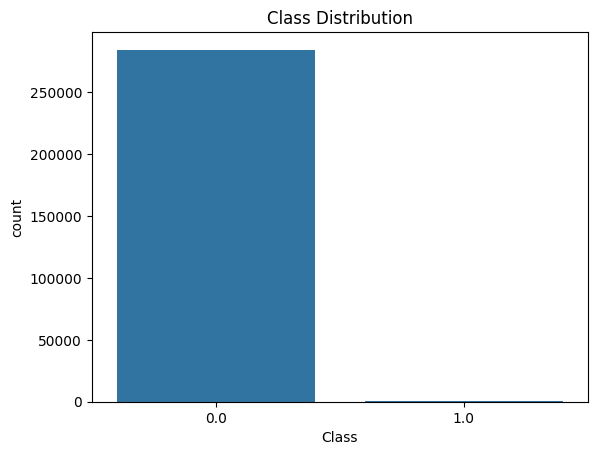

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=normalized_df)
plt.title('Class Distribution')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('tomek', TomekLinks(sampling_strategy='majority'))
])

In [ ]:
X = normalized_df.drop('Class', axis=1)
y = normalized_df['Class']

X_resampled, y_resampled = pipeline.fit_resample(X, y)

In [ ]:
print(X_resampled.shape)

(568630, 30)


In [ ]:
print(y_resampled.shape)

(568630,)


In [ ]:
print(X_resampled.tail())

            Time        V1        V2        V3        V4        V5        V6  \
568625  0.859043  0.938941  0.806032  0.723603  0.429753  0.762482  0.242810   
568626  0.373566  0.901332  0.775208  0.807985  0.290194  0.757730  0.258935   
568627  0.191114  0.964102  0.785105  0.807244  0.415539  0.760216  0.255305   
568628  0.744670  0.964863  0.784486  0.753981  0.398204  0.762208  0.253821   
568629  0.489956  0.882331  0.800835  0.730118  0.393379  0.748645  0.242265   

              V7        V8        V9  ...       V20       V21       V22  \
568625  0.249299  0.797588  0.361501  ...  0.584988  0.580497  0.572444   
568626  0.255288  0.785610  0.462153  ...  0.576309  0.567006  0.531228   
568627  0.252837  0.791298  0.392968  ...  0.583175  0.566085  0.487942   
568628  0.252428  0.792173  0.439611  ...  0.583801  0.569372  0.530358   
568629  0.239713  0.792611  0.433993  ...  0.577740  0.582248  0.519773   

             V23       V24       V25       V26       V27       V28  

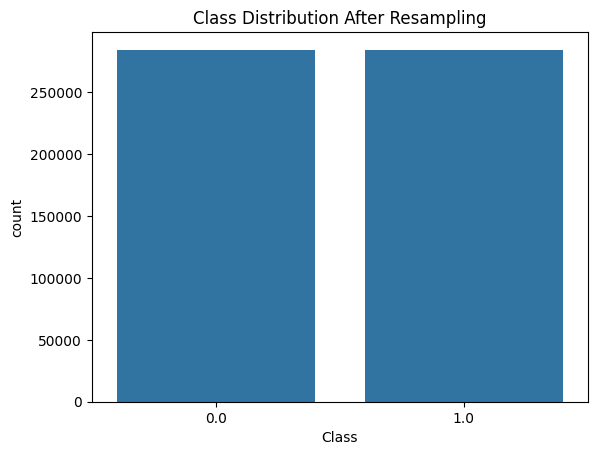

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y_resampled)
plt.title('Class Distribution After Resampling')
plt.show()

In [ ]:
import pandas as pd
print(pd.Series(y_resampled).value_counts())

Class
0.0    284315
1.0    284315
Name: count, dtype: int64


2. Build the neural network model

3. Use different activation function like tanh and ReLu in the hidden layer and sigmoid activation function in the output layer.

In [ ]:
import tensorflow as tf
from tensorflow import keras

def create_model(activation='relu'):
    model = keras.Sequential([
        keras.layers.Dense(128, activation=activation, input_shape=(X_resampled.shape[1],)),
        keras.layers.Dense(64, activation=activation),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

model_relu = create_model(activation='relu')
model_tanh = create_model(activation='tanh')

model_relu.summary()
model_tanh.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

activations = ['relu', 'tanh']
optimizers = ['SGD', 'Adam', 'RMSprop']
results = []

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Completed: Activation=relu, Optimizer=SGD


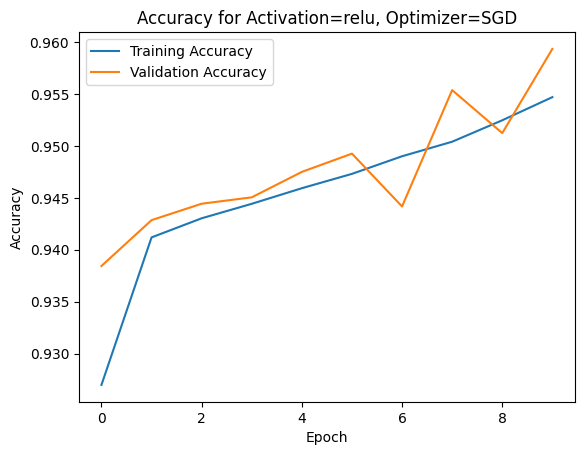

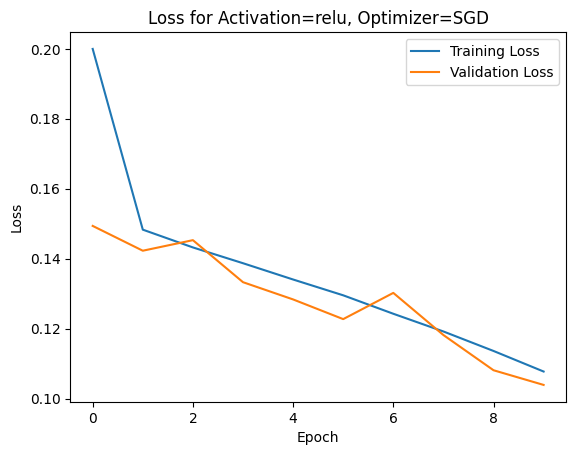

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Completed: Activation=relu, Optimizer=Adam


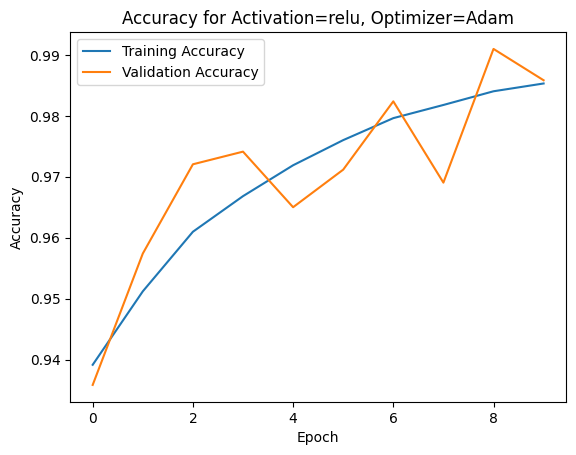

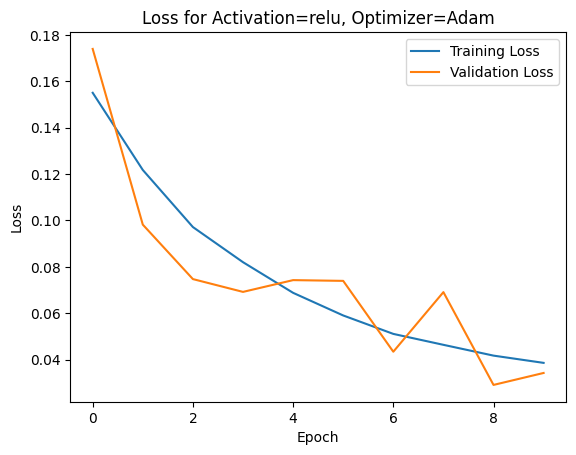

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Completed: Activation=relu, Optimizer=RMSprop


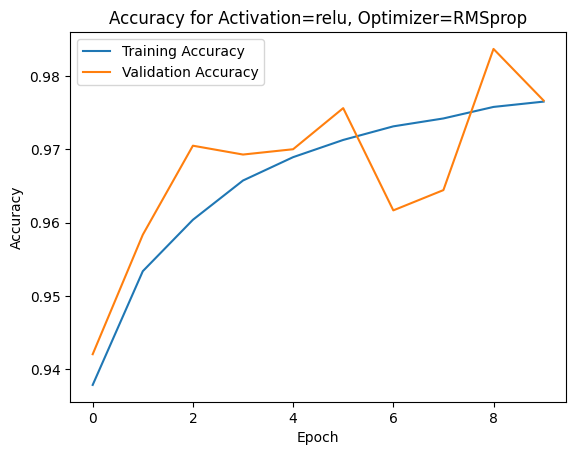

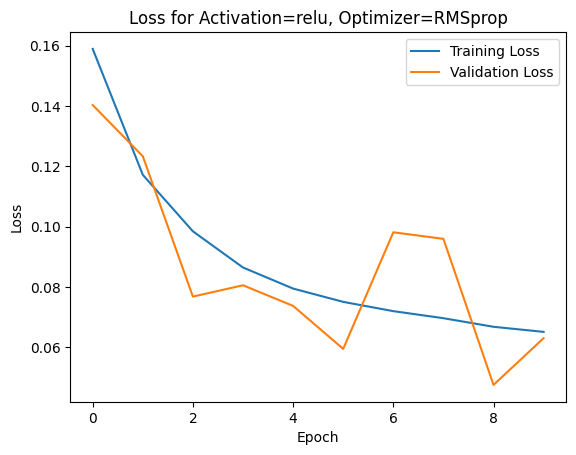

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Completed: Activation=tanh, Optimizer=SGD


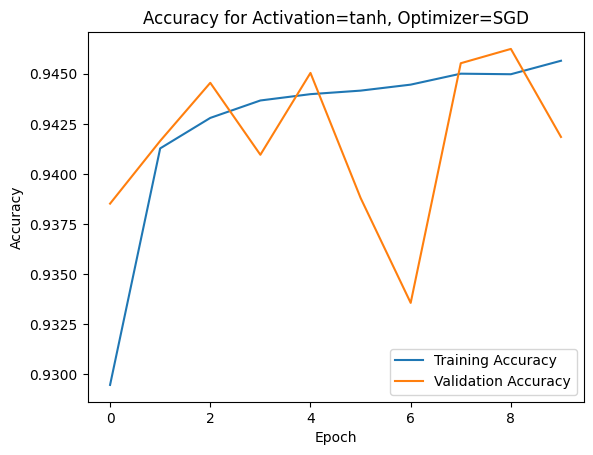

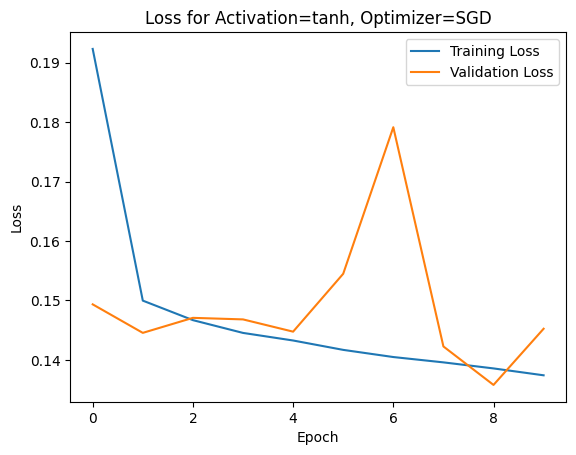

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Completed: Activation=tanh, Optimizer=Adam


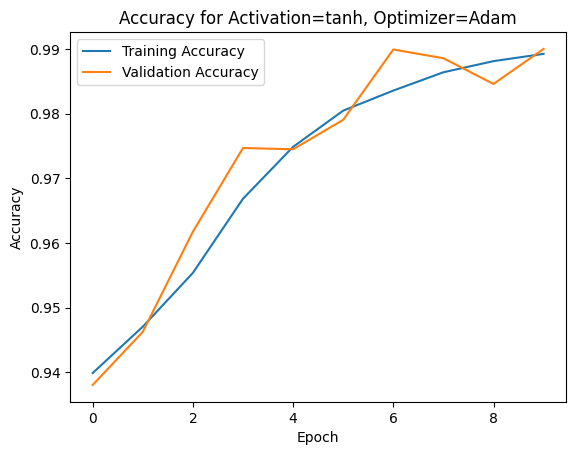

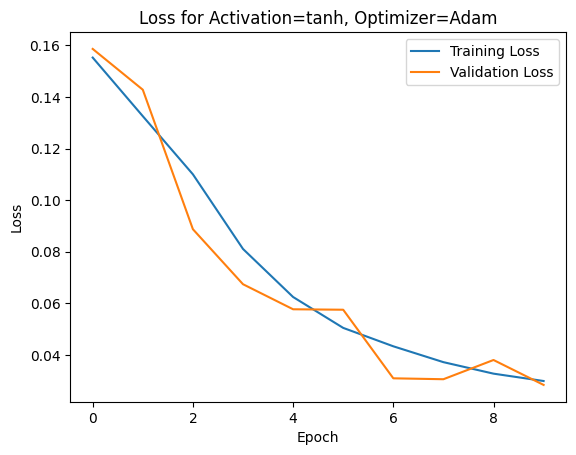

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Completed: Activation=tanh, Optimizer=RMSprop


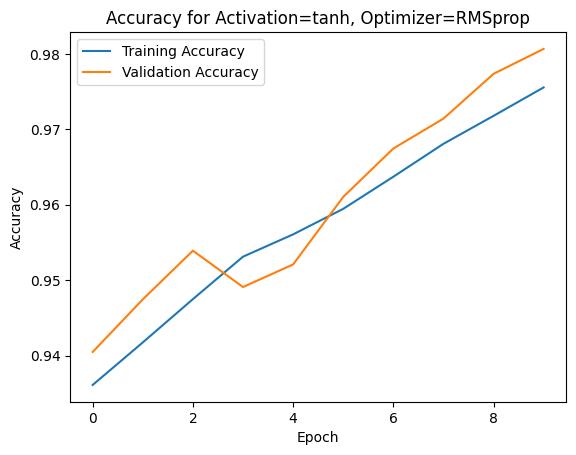

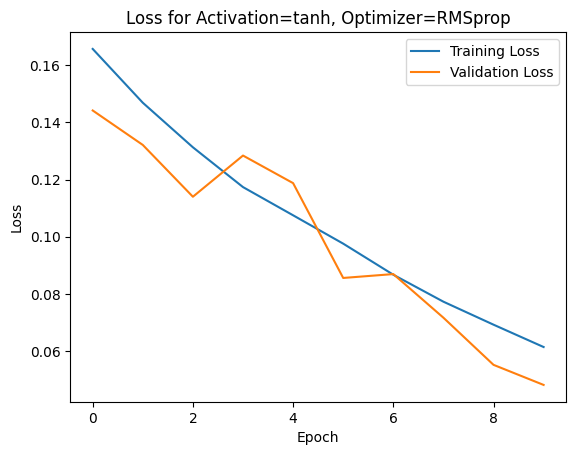

In [ ]:
for act in activations:
    for opt_name in optimizers:
        model = create_model(act)
        model.compile(optimizer=opt_name, loss='binary_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

        y_pred = model.predict(X_test)
        y_pred_classes = (y_pred > 0.5).astype(int).squeeze()

        report = classification_report(y_test, y_pred_classes, labels=[0, 1], output_dict=True, zero_division=0)

        results.append({
            'activation': act,
            'optimizer': opt_name,
            'accuracy': report.get('accuracy', 0),
            'precision': report.get('1', {}).get('precision', 0),
            'recall': report.get('1', {}).get('recall', 0),
            'f1-score': report.get('1', {}).get('f1-score', 0)
        })

        print(f"Completed: Activation={act}, Optimizer={opt_name}")
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Accuracy for Activation={act}, Optimizer={opt_name}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Loss for Activation={act}, Optimizer={opt_name}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

pr_curves = []

activations = ['relu', 'tanh']
optimizers = ['SGD', 'Adam', 'RMSprop']

for act in activations:
    for opt_name in optimizers:
        print(f"Evaluating: Activation={act}, Optimizer={opt_name}")

        model = create_model(act)

        if opt_name == 'SGD':
            optimizer = keras.optimizers.SGD()
        elif opt_name == 'Adam':
            optimizer = keras.optimizers.Adam()
        elif opt_name == 'RMSprop':
            optimizer = keras.optimizers.RMSprop()

        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
        y_pred_prob = model.predict(X_test).squeeze()
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
        auprc = auc(recall_vals, precision_vals)

        pr_curves.append({
            'activation': act,
            'optimizer': opt_name,
            'precision': precision_vals,
            'recall': recall_vals,
            'auprc': auprc
        })

Evaluating: Activation=relu, Optimizer=SGD


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Evaluating: Activation=relu, Optimizer=Adam


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Evaluating: Activation=relu, Optimizer=RMSprop


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Evaluating: Activation=tanh, Optimizer=SGD


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Evaluating: Activation=tanh, Optimizer=Adam


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Evaluating: Activation=tanh, Optimizer=RMSprop


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


5. Monitor the classification report for different optimizers and activation result.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     56750
         1.0       0.98      0.98      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



In [ ]:
import pandas as pd
results_df = pd.DataFrame(results)

print(results_df[["activation", "optimizer", "accuracy", "precision", "recall", "f1-score"]])

  activation optimizer  accuracy  precision    recall  f1-score
0       relu       SGD  0.960449   0.964522  0.956227  0.960357
1       relu      Adam  0.985957   0.991323  0.980553  0.985909
2       relu   RMSprop  0.977261   0.989418  0.964933  0.977022
3       tanh       SGD  0.943346   0.984748  0.900871  0.940944
4       tanh      Adam  0.990020   0.984470  0.995788  0.990097
5       tanh   RMSprop  0.980963   0.981330  0.980659  0.980994


6. Plot graph to show the difference.

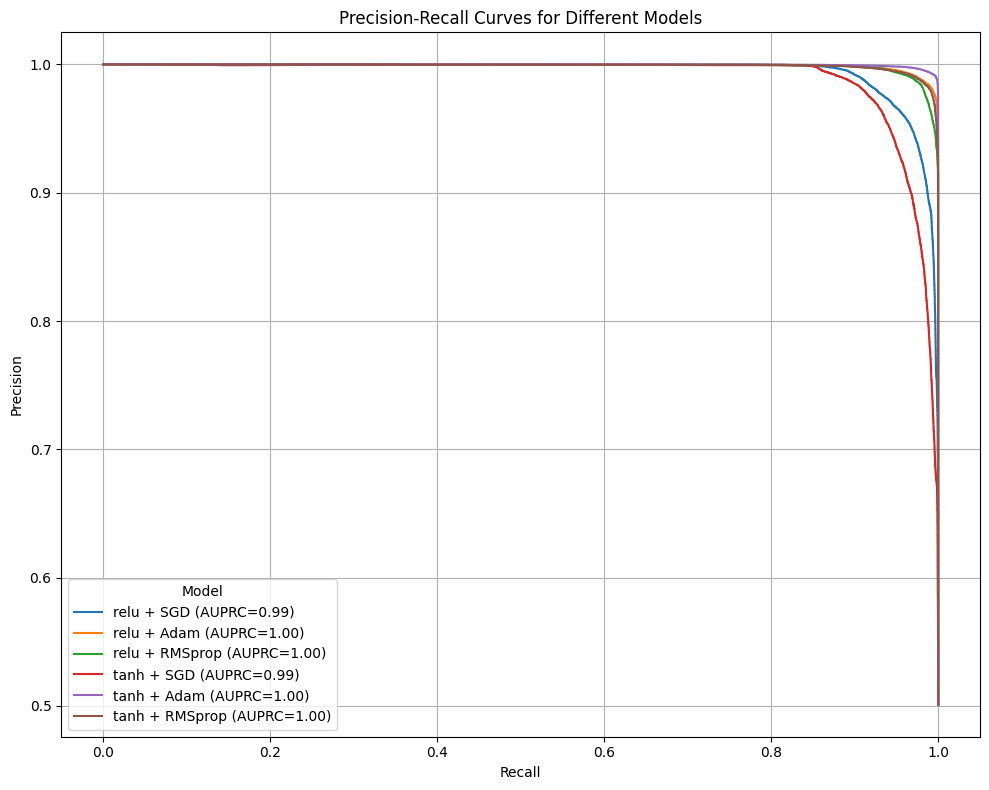

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

for curve in pr_curves:
    label = f"{curve['activation']} + {curve['optimizer']} (AUPRC={curve['auprc']:.2f})"
    ax.plot(curve['recall'], curve['precision'], label=label)

ax.set_title('Precision-Recall Curves for Different Models')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.grid(True)
ax.legend(title='Model')

plt.tight_layout()
plt.show()

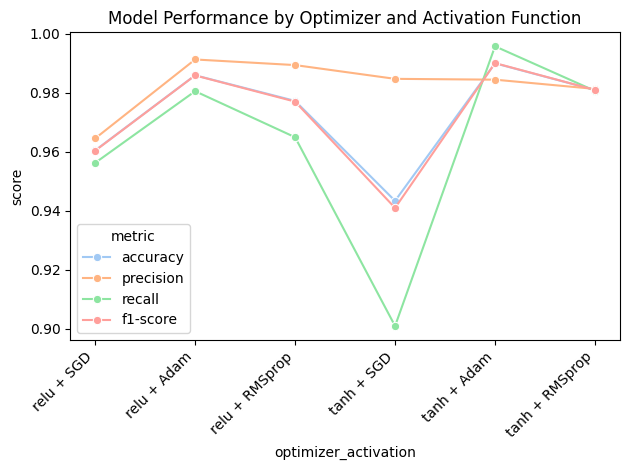

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame(results)

results_df["optimizer_activation"] = results_df["activation"] + " + " + results_df["optimizer"]

melted_df = pd.melt(
    results_df,
    id_vars=["optimizer_activation"],
    value_vars=["accuracy", "precision", "recall", "f1-score"],
    var_name="metric",
    value_name="score",
)

sns.lineplot(
    x="optimizer_activation",
    y="score",
    hue="metric",
    data=melted_df,
    marker="o",
    palette="pastel",
)
plt.title("Model Performance by Optimizer and Activation Function")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

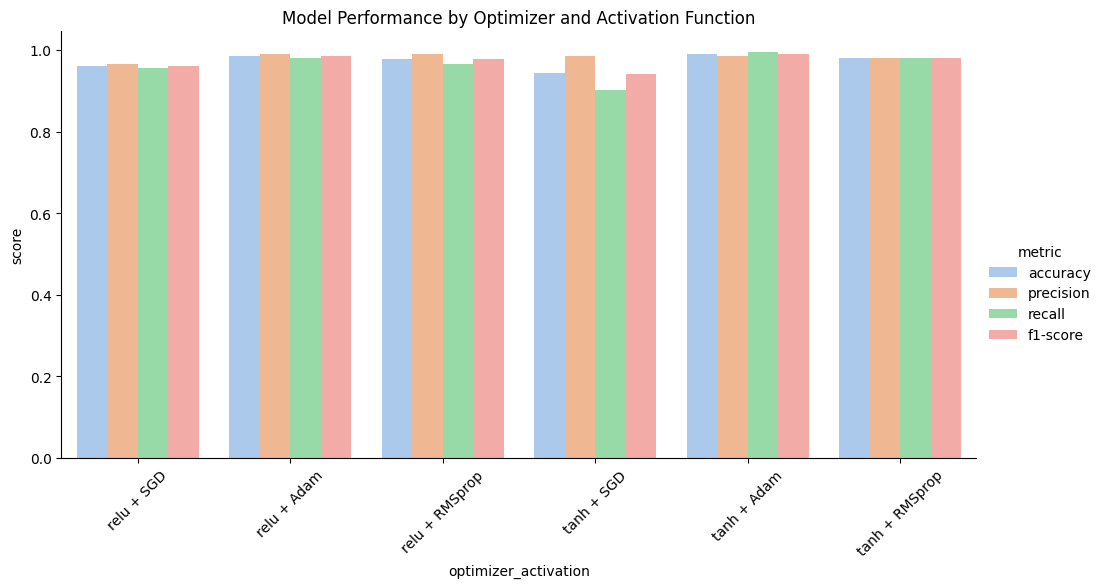

In [ ]:
results_df = pd.DataFrame(results)
results_df["optimizer_activation"] = results_df["activation"] + " + " + results_df["optimizer"]

melted_df = pd.melt(
    results_df,
    id_vars=["optimizer_activation"],
    value_vars=["accuracy", "precision", "recall", "f1-score"],
    var_name="metric",
    value_name="score",
)

sns.catplot(
    x="optimizer_activation",
    y="score",
    hue="metric",
    data=melted_df,
    kind="bar",
    height=5,
    aspect=2,
    palette="pastel",
)
plt.title("Model Performance by Optimizer and Activation Function")
plt.xticks(rotation=45)
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test).squeeze()
y_pred_class = (y_pred_prob > 0.5).astype(int)

results_df = pd.DataFrame({
    'Amount': X_test['Amount'],
    'Time': X_test['Time'],
    'y_true': y_test,
    'y_pred_prob': y_pred_prob,
    'y_pred_class': y_pred_class
})
print("Fraud Detection Results (Random 20 Transactions with Index):")
print(results_df.sample(20))

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Fraud Detection Results (Random 20 Transactions with Index):
          Amount      Time  y_true  y_pred_prob  y_pred_class
446634  0.000250  0.207703     1.0     1.000000             1
546097  0.000039  0.076428     1.0     1.000000             1
517334  0.004015  0.434465     1.0     0.860003             1
431584  0.001509  0.980855     1.0     0.941662             1
282700  0.000330  0.990086     0.0     0.000565             0
291541  0.000039  0.049453     1.0     0.999998             1
371069  0.007805  0.350962     1.0     0.999989             1
295276  0.000039  0.394735     1.0     1.000000             1
284365  0.001144  0.997616     0.0     0.000025             0
339051  0.000039  0.444857     1.0     0.992393             1
43738   0.001863  0.240960     0.0     0.000072             0
113807  0.000105  0.423700     0.0     0.062086             0
98447   0.000389  0.385816     0.0     0.123890             0
543441  0.000039  0.488025  

In [ ]:
misclassified_transactions = results_df[results_df['y_true'] != results_df['y_pred_class']]
print("\nMisclassified Transactions:")
print(misclassified_transactions)


Misclassified Transactions:
          Amount      Time  y_true  y_pred_prob  y_pred_class
229226  0.002219  0.844049     0.0     0.543379             1
187696  0.002975  0.738738     0.0     0.933696             1
207386  0.000584  0.790829     0.0     0.889166             1
238732  0.000039  0.866915     0.0     0.706867             1
64136   0.000030  0.295401     0.0     0.850424             1
...          ...       ...     ...          ...           ...
11589   0.000296  0.115225     0.0     0.944807             1
13890   0.007382  0.142669     0.0     0.565965             1
239846  0.000039  0.869815     0.0     0.936336             1
221831  0.000393  0.825958     0.0     0.843561             1
156841  0.000306  0.630972     0.0     0.844549             1

[2009 rows x 5 columns]
